## More Pre-processing 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in multiple files 

In [4]:
# read in multiple files 
import glob

datafiles = glob.glob('../../original_data/mbti_reddit_clean*.csv') #the * is a wildcard

datafiles.sort() # must have this line to sort the names 

print(datafiles)

['../../original_data/mbti_reddit_clean1.csv', '../../original_data/mbti_reddit_clean10.csv', '../../original_data/mbti_reddit_clean11.csv', '../../original_data/mbti_reddit_clean12.csv', '../../original_data/mbti_reddit_clean13.csv', '../../original_data/mbti_reddit_clean14.csv', '../../original_data/mbti_reddit_clean15.csv', '../../original_data/mbti_reddit_clean16.csv', '../../original_data/mbti_reddit_clean17.csv', '../../original_data/mbti_reddit_clean18.csv', '../../original_data/mbti_reddit_clean2.csv', '../../original_data/mbti_reddit_clean3.csv', '../../original_data/mbti_reddit_clean4.csv', '../../original_data/mbti_reddit_clean5.csv', '../../original_data/mbti_reddit_clean6.csv', '../../original_data/mbti_reddit_clean7.csv', '../../original_data/mbti_reddit_clean9.csv']


In [5]:
# concat multiple files into one 
df_new = pd.concat((pd.read_csv(f, lineterminator='\n') for f in datafiles))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
# check rows and shape 
df_new.shape

(3004071, 7)

In [7]:
df_new.head(n=50)

,MBTI,Unnamed: 0,comments,flair,index,subreddit,username
0,INFP,0,Lol that's why I left.,INFP: The Dreamer Senpai,NaN,entp,LadyBanterbury
1,INTP,1,"I was just about to post ""I try telling people...",INTP: The Theorist,NaN,INTP,Finarin
2,INFP,2,My first thought was Pepsi or something. Proba...,INFP: The Dreamer,NaN,WTF,xanplease
3,ENTP,3,"Not if the formula is something like ""every ti...","ENTP: Antisocial Extrovert, Rational Eccentric",NaN,youtubehaiku,HeirToGallifrey
4,INTP,4,Does this imply I'm a five now?,INTP/18/m/blankly staring at you,NaN,entp,lightfive
5,INTP,5,"Well, I wouldn't know but I think there's a lo...",INTP: The Theorist,NaN,InternetIsBeautiful,ElementalVoltage
6,INFJ,6,"sine na, support the directors, actors and oth...",The INFJ Dude,NaN,Philippines,BabyFlo70
7,INFP,7,I use just enough vacation days so that I don'...,Honorary INFP; INTP/21/F,NaN,tumblr,RockinSocksReborn
8,INTP,8,Can be ur angle... or you're devil ;),intp or something of the sort,NaN,woof_irl,crowbird_
9,INTP,9,I mean we don't how much influence Crow has on...,INTP/23/F,NaN,RWBY,RockinSocksReborn


### Missing Values

In [8]:
# Check missing values
df_new.isna().sum()

MBTI             3289
Unnamed: 0          0
comments            0
flair               0
index         1555087
subreddit           0
username            0
dtype: int64

In [9]:
# drop 2 duplicated index column 
df_new = df_new.drop(['index','Unnamed: 0'], axis=1).copy()

In [10]:
# check for missing values again.
df_new.isna().sum()

MBTI         3289
comments        0
flair           0
subreddit       0
username        0
dtype: int64

In [11]:
# drop the rows with null body text 
df_clean = df_new.dropna().copy()

In [12]:
df_clean.isna().sum()

MBTI         0
comments     0
flair        0
subreddit    0
username     0
dtype: int64

### EDA

In [13]:
df_clean['MBTI'].value_counts()

INFP    312220
INTP    301236
INFJ    271994
ENTJ    257355
ISTP    226154
ENTP    224612
ENFP    206537
ENFJ    182589
INTJ    176802
ESTP    161173
ISFJ    157556
ISTJ    155944
ISFP    142215
ESTJ     96501
ESFP     67022
ESFJ     60872
Name: MBTI, dtype: int64

Text(0.5, 1.0, 'Comments Counts by Personality Types')

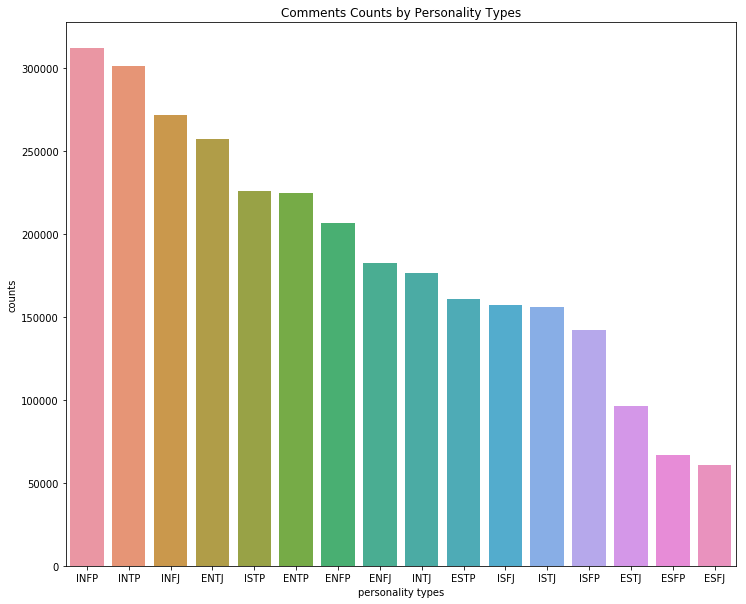

In [14]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_clean, x='MBTI', order = df_clean['MBTI'].value_counts().index)
plt.xlabel('personality types')
plt.ylabel('counts')
plt.title('Comments Counts by Personality Types')

In [15]:
df_clean['comments length'] = df_clean['comments'].str.len()

In [16]:
df_avglength=pd.DataFrame(df_clean.groupby(['MBTI'])['comments length'].mean())
df_avglength = df_avglength.sort_values(['comments length'], ascending=False)
df_avglength

,comments length
MBTI,
ESFJ,282.256160
ISTP,261.368930
ESTJ,248.995741
INTJ,245.320098
ISFP,245.061442
INFJ,234.872556
ENFJ,226.650664
ENTP,221.916367
ISFJ,221.864689


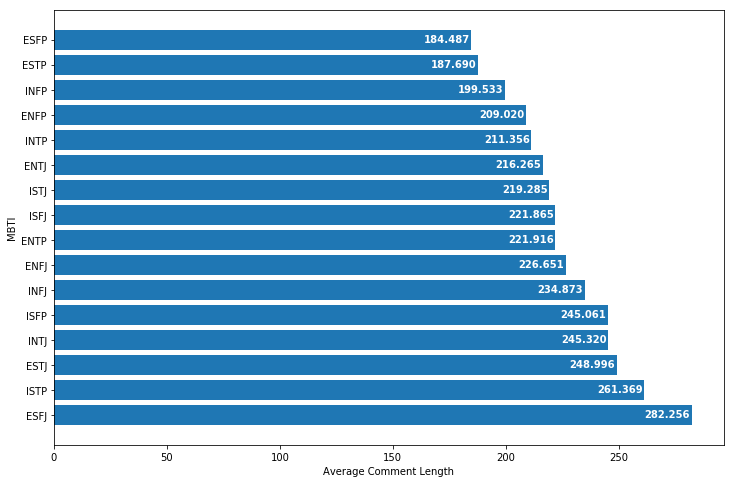

In [17]:
plt.figure(figsize=(12,8))
ax = plt.subplot()
plt.barh(df_avglength.index,df_avglength['comments length'])
plt.xlabel('Average Comment Length')
plt.ylabel('MBTI')
for i, v in enumerate(df_avglength['comments length']):
    ax.text(v-21, i - 0.1, f'{v:.3f}', color='white', fontweight='bold')
plt.show()

### More Feature Engineering

In [23]:
df_clean_comments = df_clean.drop(['flair','subreddit','username','comments length'],axis=1)

In [24]:
df_clean_comments.shape

(3000782, 2)

In [25]:
df_clean_comments['comments'] = df_clean_comments['comments'].apply(lambda x: x.replace('\n',' ').replace('\r',' '))

In [21]:
df_clean_comments1.to_csv('../../clean_data/with_punc.csv')

In [65]:
# create a test subset 
df_test = df_clean_comments.sample(n=100)

### Text Processing 

In [26]:
df_clean_comments.dtypes

MBTI        object
comments    object
dtype: object

In [69]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

In [78]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Doylism/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Doylism/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Doylism/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [79]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [80]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

#### Remove numbers 

In [81]:
# remove numbers 
import re 


#### Remove punctuations

In [32]:
# remove punctuations 
def remove_punc(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#### Remove Stop Words

In [33]:
def remove_stop(text):
    tokens = word_tokenize(text)
    text = [i for i in tokens if not i in stop_words]
    return text

#### Lemmitisation & Stemming

In [84]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [85]:
df_test['comments'] = df_test['comments'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(x)])

TypeError: expected string or bytes-like object

In [66]:
df_test['comments'] = df_test['comments'].apply(lambda x: lemmitization(x))

TypeError: 'WordNetLemmatizer' object is not callable

In [44]:
def stemming(text):
    text = ' '.join(stemmer(word) for word in text.split())
    return text

#### A combined function 

In [62]:

# cleaning function
def preprocess(text):
    # convert to lower case
    text = text.lower()
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove punctuation 
    text = ' '.join(text.replace(punctuation, '') for punctuation in string.punctuation)
    # remove stop words
    text = ' '.join(word for word in text.split() if not word in stop_words)
    # Lemmitization
    # text = ' '.join(wordnet_lemmatizer(word for word in text.split()))
    # stemming 
    text = ' '.join(stemmer(word) for word in text.split())
    return text 

**Try on the complete dataset** 

In [63]:
df_clean_comments['comments'] = df_clean_comments['comments'].apply(lambda x: preprocess(x))
df_clean_comments.head(10)

TypeError: 'PorterStemmer' object is not callable

In [52]:
df_clean_comments['comments'].apply(lambda x: len(x.split(' '))).sum()
# 61 millions words!!! 

61310757

In [54]:
# check for Nan after the cleaning 
df_clean_comments.isna().sum()

MBTI        0
comments    0
dtype: int64

In [55]:
df_clean_comments[df_clean_comments['comments'].str.len()<1]

,MBTI,comments
175,INFJ,
325,ENTJ,
515,INTJ,
589,INTP,
608,ISTP,
...,...,...
61326,ISTJ,
61376,ISTJ,
61429,ISFJ,
61472,ESTP,


In [53]:
# save the cleaned data as a csv file 
df_clean_comments.to_csv('../../clean_data/clean_comments.csv')

---